# General usage of the package:

In [1]:
from dhybridrpy import DHybridrpy

`dhybridrpy` easily and efficiently gives you programmatic access to your dHybridR input and output data. First, create a `DHybridrpy` object and specify your dHybridR input file and output folder.

In [2]:
input_file = "data/inputs/input"
output_folder = "data/Output"

dpy = DHybridrpy(input_file=input_file, output_folder=output_folder)

Let's print some information. For example, the simulation timesteps are

In [3]:
dpy.timesteps()

array([  1,  32,  64,  96, 128])

Variables in your input file can be accessed via the nested dictionary `inputs` (a `Namelist` object which implements all the usual `dict` functions). For example,

In [4]:
print(f"Timestep = {dpy.inputs['time']['dt']}")
print(f"Number of cells along each axis = {dpy.inputs['grid_space']['ncells']}")
print(f"Initial By = {dpy.inputs['ext_emf']['By']}")

Timestep = 0.0025
Number of cells along each axis = [128, 128]
Initial By = 0.05


All inputs can be viewed by printing `dpy.inputs`:

In [5]:
dpy.inputs

Namelist([('node_conf', Namelist([('node_number', [1, 1])])),
          ('time',
           Namelist([('dt', 0.0025),
                     ('niter', 128),
                     ('t0', 0.0),
                     ('stiter', 0),
                     ('c', 200.0)])),
          ('grid_space',
           Namelist([('ncells', [128, 128]),
                     ('boxsize', [64.0, 64.0]),
                     ('bdtype', ['reflect', 'open', 'per', 'per']),
                     ('te', 1.0),
                     ('gamma', 1.67)])),
          ('global_output',
           Namelist([('dodump', True),
                     ('ndump', 32),
                     ('b0', 3.05191e-07),
                     ('n0', 1000000.0),
                     ('units', 'NORM')])),
          ('restart',
           Namelist([('do_restart', False),
                     ('save_restart', False),
                     ('restart_step', 2500)])),
          ('ext_emf',
           Namelist([('bx', '0.'),
                     ('by', '0.

To see all the fields, phases, and raw files found at a given timestep, you can print `dpy.timestep(ts)` for a timestep `ts` or `dpy.timestep_index(index)` at any valid timestep array index `index`:

In [6]:
ts = 128
dpy.timestep(ts)

Fields at timestep 128 = {'origin = Total': ['Bmagnitude', 'Bx', 'By', 'Bz', 'Emagnitude', 'Ex', 'Ey', 'Ez', 'Jmagnitude', 'Jx', 'Jy', 'Jz'], 'origin = External': [], 'origin = Self': ['Bmagnitude', 'Bx', 'By', 'Bz', 'Emagnitude', 'Ex', 'Ey', 'Ez']}
Phases at timestep 128 = {'species = 1': ['etx1', 'p1x1', 'p2x1', 'p3x1', 'x3x2x1']}
Raw files at timestep 128 = {}

In [7]:
ts_index = -1 # The last simulation timestep
dpy.timestep_index(ts_index)

Fields at timestep 128 = {'origin = Total': ['Bmagnitude', 'Bx', 'By', 'Bz', 'Emagnitude', 'Ex', 'Ey', 'Ez', 'Jmagnitude', 'Jx', 'Jy', 'Jz'], 'origin = External': [], 'origin = Self': ['Bmagnitude', 'Bx', 'By', 'Bz', 'Emagnitude', 'Ex', 'Ey', 'Ez']}
Phases at timestep 128 = {'species = 1': ['etx1', 'p1x1', 'p2x1', 'p3x1', 'x3x2x1']}
Raw files at timestep 128 = {}

Fields are classified by their origin: `Total`, `External`, and `Self`. Similarly, phases are classified by their particle species, which can be any integer (1,2,...) or `Total` for all species. For example, the total $B_x$ field at timestep `ts` is

In [8]:
# The kwarg `origin = Total` is default, so you can equivalently call `Bx()`
Bx = dpy.timestep(ts).fields.Bx(origin="Total")
print(Bx)

Field(file_path=data/Output/Fields/Magnetic/Total/x/Bfld_00000128.h5, name=Bx, timestep=128, lazy=False, origin=Total)


Each field or phase has several attributes you can call to extract output data:

In [9]:
print(f"Bx data = {Bx.data}")
print(f"x grid = {Bx.xdata}")
print(f"y grid = {Bx.ydata}")
print(f"x grid limits = {Bx.xlimdata}")
print(f"y grid limits = {Bx.ylimdata}")

Bx data = [[-1.6953930e-04 -1.2085598e-05  1.4356333e-04 ... -4.1707812e-04
  -3.9658975e-04 -3.0320088e-04]
 [-3.0509857e-04  3.9704442e-05  3.6210890e-04 ... -8.9446275e-04
  -8.3441212e-04 -6.1186211e-04]
 [-2.9952321e-04  1.8153670e-04  5.9646327e-04 ... -1.2025090e-03
  -1.0946279e-03 -7.5318234e-04]
 ...
 [-4.6586967e-04 -1.4698445e-03 -1.8113126e-03 ...  9.9344330e-04
   1.1278227e-03  5.7737844e-04]
 [-1.5176806e-03 -1.5961498e-03 -7.5951888e-04 ...  9.9545019e-04
   3.8895290e-04 -6.7824428e-04]
 [-1.6570499e-03 -1.2268145e-03  4.6955320e-05 ...  5.2652013e-04
  -2.3863096e-04 -1.1877241e-03]]
x grid = [ 0.25  0.75  1.25  1.75  2.25  2.75  3.25  3.75  4.25  4.75  5.25  5.75
  6.25  6.75  7.25  7.75  8.25  8.75  9.25  9.75 10.25 10.75 11.25 11.75
 12.25 12.75 13.25 13.75 14.25 14.75 15.25 15.75 16.25 16.75 17.25 17.75
 18.25 18.75 19.25 19.75 20.25 20.75 21.25 21.75 22.25 22.75 23.25 23.75
 24.25 24.75 25.25 25.75 26.25 26.75 27.25 27.75 28.25 28.75 29.25 29.75
 30.25 30.75 31.

We can also quickly plot data. Each field or phase has a `plot` function that accepts a variaty of arguments, allowing you to customize the plot to your liking. Simply call `plt.savefig(...)` afterward to save the figure.

(<Axes: title={'center': 'Bx at timestep 128 (origin = Total)'}, xlabel='$x$', ylabel='$y$'>,
 <matplotlib.collections.QuadMesh at 0x7fdec45d9950>)

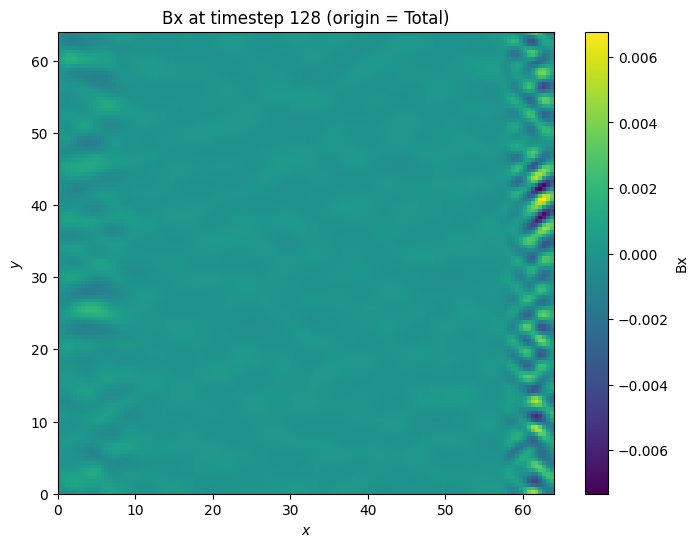

In [10]:
import matplotlib.pyplot as plt
Bx.plot()

An analogous plot for a phase object is

(<Axes: title={'center': 'x3x2x1 at timestep 128 (species = 1)'}, xlabel='$x$', ylabel='$y$'>,
 <matplotlib.collections.QuadMesh at 0x7fdeabe8e890>)

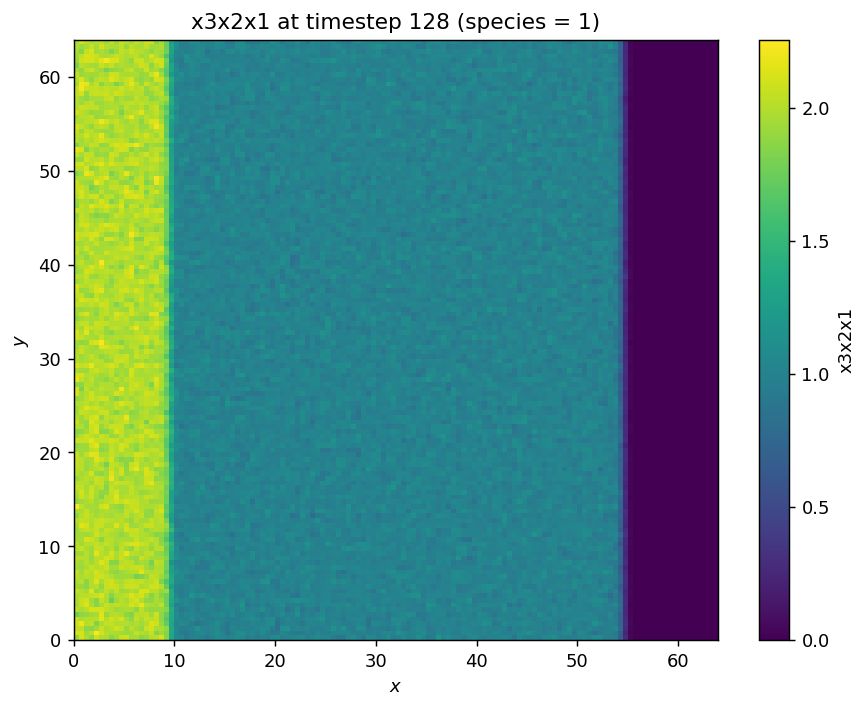

In [32]:
# The kwarg `species = 1` is default, so you can equivalently call `x3x2x1()`
dpy.timestep(ts).phases.x3x2x1(species=1).plot(dpi=130)

# Lazy loading of large datasets with `dask`

For extremely large output files (from large 2D or 3D simulations), eagerly loading the data may be impractical due to memory limitations or slow processing speeds. To address this, you can instantiate the `DHybridrpy` object with `lazy = True`. This leverages the `dask` library to load data lazily, performing computations only when `compute()` is explicitly called. This approach allows datasets larger than the available memory to be efficiently loaded thanks to `dask`'s use of computational graphs and parallelized processing.

In [38]:
dpy = DHybridrpy(input_file=input_file, output_folder=output_folder, lazy=True)
dpy.timestep_index(-1)

Fields at timestep 128 = {'origin = Total': ['Bmagnitude', 'Bx', 'By', 'Bz', 'Emagnitude', 'Ex', 'Ey', 'Ez', 'Jmagnitude', 'Jx', 'Jy', 'Jz'], 'origin = External': [], 'origin = Self': ['Bmagnitude', 'Bx', 'By', 'Bz', 'Emagnitude', 'Ex', 'Ey', 'Ez']}
Phases at timestep 128 = {'species = 1': ['etx1', 'p1x1', 'p2x1', 'p3x1', 'x3x2x1']}
Raw files at timestep 128 = {}

In [52]:
p2x1 = dpy.timestep(ts).phases.p2x1()

print(f"p2x1 = {p2x1}")
print(f"p2x1 data = {p2x1.data}")

p2x1 = Phase(file_path=data/Output/Phase/p2x1/Sp01/dens_sp01_00000128.h5, name=p2x1, timestep=128, lazy=True, species=1)
p2x1 data = dask.array<from-value, shape=(256, 512), dtype=float32, chunksize=(256, 512), chunktype=numpy.ndarray>


In [55]:
print(f"p2x1 data = {p2x1.data.compute()}")

p2x1 data = [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(<Axes: title={'center': 'p2x1 at timestep 128 (species = 1)'}, xlabel='$x$', ylabel='$y$'>,
 <matplotlib.collections.QuadMesh at 0x7fdebad06790>)

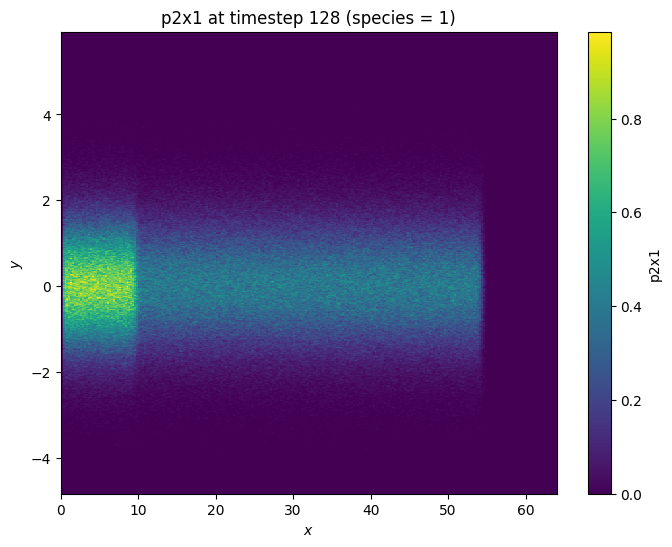

In [54]:
p2x1.plot()